In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [91]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.groupby(['Sex', 'Survived']).mean()

PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1         51.938573  
male   0         21.960993  
       1         40.821484

In [8]:
train.pivot_table(index=['Sex'], values=['Survived'])

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


In [12]:
train.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [19]:
train.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [22]:
train['Survived'] = train['Survived'].astype('int')

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


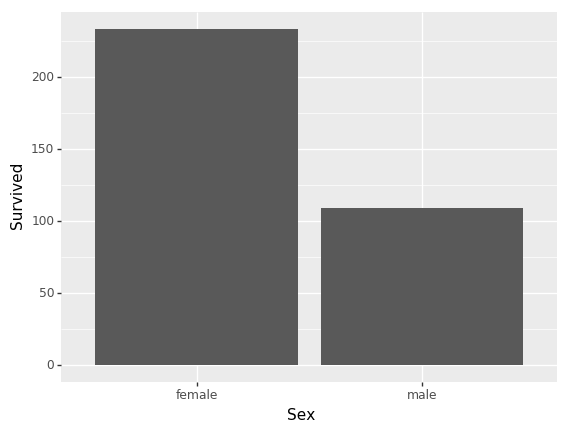

<ggplot: (292255913)>

In [23]:
(ggplot(train)
+ aes(x='Sex', y='Survived')
+ geom_col()
)

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


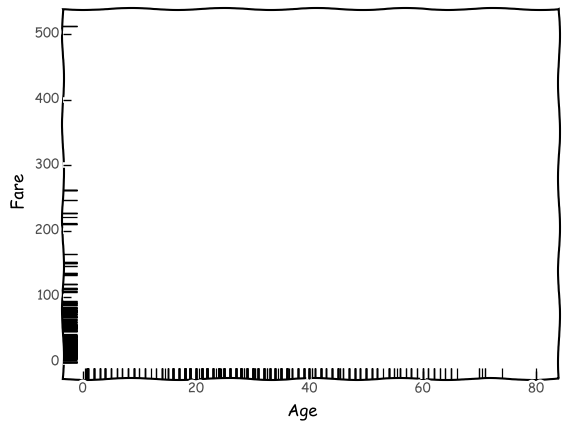

<ggplot: (7555312879)>

In [120]:
train['Survived'] = train['Survived'].astype('category')
(ggplot(train)
+ aes(x='Age', y='Fare', fill='Survived')
+ geom_rug()
+ theme_xkcd()
)

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


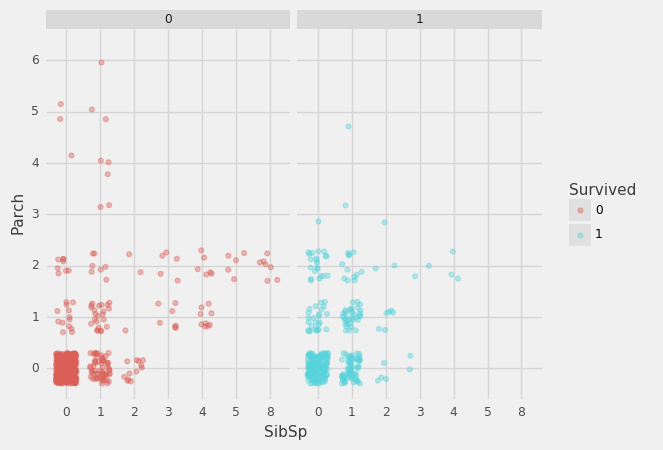

<ggplot: (7554945330)>

In [124]:
train['Survived'] = train['Survived'].astype('category')
train['Parch'] = train['Parch'].astype('category')
train['SibSp'] = train['SibSp'].astype('category')
(ggplot(train)
+ aes(x='SibSp', y='Parch', color='Survived')
+ geom_jitter(alpha=0.4, width=0.3, height=0.3)
+ theme_538()
+ facet_wrap('~Survived')
)

In [41]:
print(train['Fare'].max())

512.3292


In [44]:
a = train[(train['Fare']>500) & (train['Survived']==1)]

In [45]:
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [125]:
test['Survived'] = 0

In [126]:
test.shape

(418, 12)

In [127]:
test['Survived'] = ( test['Sex'] == 'female') \
                | ( test['Age'] <= 9)

In [128]:
test['Survived'].value_counts() # 생존자가 163명

False    255
True     163
Name: Survived, dtype: int64

In [131]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [145]:
submission = test[['PassengerId', 'Survived']].copy() # test파일에서 패신저 아이디와 생존여부 목록만 가져와 새로운 데이터프레임 생성

In [146]:
submission.head()

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True


In [147]:
submission['Survived'] = submission['Survived'].astype(int)

In [149]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [150]:
submission.to_csv('submission_female_children.csv', index=False)

In [151]:
s = pd.read_csv('submission_female_children.csv')

In [152]:
s.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [153]:
%pwd

'/Users/chaewonkang/Projects/titanic'